# Retail Analysis Notebook

Suite of retail analysis tools geared to determining priority stores to visit.


## Pre Notebook
We have 'initialanalysis.py' which should be ran from the command line. From ceres a donor unsummaraized report with all retail banners is created and saved as a .csv excel sheet. Save file as MonthYear.csv ex. Apr20.csv. When initialanalysis is ran it will parse the csv file and output json files containing a dictionary object for each banner saved into the banner file named BannerMonthYear.json. 

#### JSON file is in following structure:
```python

banner = {
    store_id:{
        "Donation Category": donated_total,
        "Donation Category": donated_total,
        "Donation Category": donated_total,
        "Store total": total
    },
    store_id:{
        "Donation Category": donated_total,
        "Donation Category": donated_total,
        "Donation Category": donated_total,
        "Store total": total
    }
    }
```


File contains more detailed notes of process.

## Cell 1:
Create main functions for comparison.

### date_list 
Function takes date index from python dictionary to find current date. With current date it creates list of past 11 months. Helper function for other comparisons. Output is list of dates.

### year_compare 
Function takes banner and target date in format "WM" and "Apr20" and will compare each store to total of same month last year. Output is store keys and totals they are down.

### month_compare
Function takes banner and target date in format "WM" and "Apr20" and will compare each store to total of previous month. Output is store keys and totals they are down.

### avg_compare 
Function takes banner and target date in formate "WM" and "Apr20" and will compare each store to total average for last 11 months. Output is store keys and totals they are down.

In [1]:
import json as json
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import csv


def date_list(date_index):
#     date_index = date_index.split("/")
    month = int(date_index[0])
    year = int(date_index[1][2:])
    dates = []
    for i in range(1,int(date_index[0])):
        dates.append(Months[str(month - i)] + str(year))
    for n in range(12 - int(date_index[0])):
        dates.append(Months[str(12-n)] + str(year-1))
    return dates 



def year_compare(banner, date):
        with open('banner/' + banner + '/' + banner + date + '.json') as f:

            current = json.load(f)
        month = date[:3]
        year = int(date[-2:])
        prev_year = str(year - 1)
        year = str(year)
        with open('banner/' + banner + '/' + banner + month + prev_year + '.json') as f:
             previous = json.load(f)
                
        print("Comparison of " + banner + " " + date + " compared to " + month + prev_year)
        for key in current:
            if key in previous:
                if key != 'date':
                    current_tot = int(current[key]["Store Total"])
                    prev_tot = int(previous[key]["Store Total"])
                    if current_tot < prev_tot:
                        print("Store: " + key + " is down " + str(prev_tot-current_tot))
            else:
                print(key + " not in previous records")

Months = {
        "1": "Jan",
        "2": "Feb",
        "3": "Mar",
        "4": "Apr",
        "5": "May",
        "6": "June",
        "7": "July",
        "8": "Aug",
        "9": "Sep",
        "10": "Oct",
        "11": "Nov",
        "12": "Dec"
         }                
                
                
def month_compare(banner, date):
    
        with open('banner/' + banner + '/' + banner + date + '.json') as f:
            current = json.load(f)
        month = current['date'][0]
        year = date[-2:]
        if month == "1":
            prev_month = "Dec"
        else:
            prev_month = int(month) - 1
            prev_month = Months[str(prev_month)]
        
        with open('banner/' + banner + '/' + banner + prev_month + year + '.json') as f:
             previous = json.load(f)
                
        print("Comparison of " + banner + " " + date + " compared to " + prev_month + year)
        for key in current:
            if key in previous:
                if key != 'date':
                    current_tot = int(current[key]["Store Total"])
                    prev_tot = int(previous[key]["Store Total"])
                    if current_tot < prev_tot:
                        print("Store: " + key + " is down " + str(prev_tot-current_tot))
            else:
                print(key + " not in previous records")
                
    
def avg_store_total(store_dict, store_key):
    total_agg = 0
    divisor = 0
    for item in store_dict:
        if store_key in store_dict[item]:
            total_agg += store_dict[item][store_key]["Store Total"]
            divisor += 1
#     print(total_agg)
    return total_agg/divisor
    
    
def avg_compare(banner, date):
    with open('banner/' + banner + '/' + banner + date + '.json') as f:
            current = json.load(f)
    print("Comparison of " + banner + " " + date + " compared to YTD AVG")
    prev_dict = {}
    dates = date_list(current['date'])
    for d in dates:
        file = banner + d + '.json'
        name = banner + d
        with open('banner/' + banner + '/' + file) as f:
            prev_dict[name] = json.load(f)
    
    for key in current:
        if key != "date":
            current_tot = current[key]["Store Total"]
            avg_tot = int(avg_store_total(prev_dict, key))
            if current_tot < avg_tot:
                        print("Store: " + key + " is down " + str(avg_tot-current_tot))

## Below we have examples of functions above.

In [14]:
avg_compare("KROGER", "May20")

Comparison of KROGER May20 compared to YTD AVG
Store: 4000 is down 1076.0
Store: 4010 is down 1240.0
Store: 4013 is down 1089.0
Store: 4015 is down 710.0


In [15]:
year_compare("TARGET", "May20")

Comparison of TARGET May20 compared to May19
Store: 100234 is down 765
Store: 12723 is down 868
Store: 15025 is down 306
Store: 18383 is down 2525
Store: 197005 is down 884
Store: 222222 is down 1615
Store: 23004 is down 5975
Store: 23501 is down 2519
Store: 400000 is down 7103
Store: 445566 is down 1896
Store: 567444 is down 5829
Store: 79555 is down 577


In [16]:
month_compare("RULER", "May20")

Comparison of RULER May20 compared to Apr20
Store: 1608475 is down 294
Store: 1608500 is down 1168
Store: 1608526 is down 711
1608545 not in previous records
Store: 1608565 is down 15
Store: 1608725 is down 146
Store: 1608726 is down 660


## Pandas Analysis

We now enter data manipulation with Pandas. We want to avoid getting bogged down with obscure data inferrences so we will focus on visualizing trends.

### Creating our dataframe

We outline our function below that uses our date_list function to collect a years worth of data and creates a table that includes every store in a banner and the totals from each of those months.


In [5]:
def banner_df(banner, date, index="Store Total"):
    banner_list = []
    column_index = ["Store"]
    
    with open('banner/' + banner + '/' + banner + date + '.json') as f:
            current = json.load(f)
    list_of_dates = date_list(current["date"])
    
    for item in list_of_dates[::-1]:
        column_index.append(item)
        
    column_index.append(date)
    row_to_append = []
    row_to_append.append(column_index)
    
    prev_dict = {}
    
    for d in column_index[1:]:
        file = banner + d + '.json'
        name = banner + d
        with open('banner/' + banner + '/' + file) as f:
            prev_dict[d] = json.load(f)
    
    for row in current:
        if row != "date":
            temp = []
            temp.append(row)
            
            for item in column_index[1:]:
#                 print(item)
                if row in prev_dict[item]:
#                     print(prev_dict[item][row][index])
                    temp.append(prev_dict[item][row][index])
            
            temp.append(current[row][index])
            row_to_append.append(temp)
            
            dates = date_list(current['date'])
            current[row][index]
    
    for i in range(len(row_to_append)):
        if i != 0:
            key = row_to_append[i][0]
            title = locations[locations['key'] == str(key)]["street"]
            title = title.values[0]
            row_to_append[i][0] = title
            
    df = pd.DataFrame(row_to_append)
    data = df[df.columns[:-1]]
    new_header = data.iloc[0] #grab the first row for the header
    data = data[1:] #take the data less the header row
    data.columns = new_header
    data.fillna(value=0, inplace=True)
    
    
    return data
            





# Creates dataframe with banner and index

## Panda Functions
With Pandas we get into our real analysis of the data. Our function below takes a banner and current date as the argument and returns multiple charts that show the donation behavior of all stores who are lower than previous months. Each chart is titled with store key.


#### To Do
- Add functionality to change title from store key to store address.
- Other comparisons like average.

In [6]:

file = open("location_final.csv")
reader = csv.reader(file)


mapping = list(reader)
header = mapping[0]
mapping = mapping[1:]
c = pd.DataFrame(mapping, columns = header)
locations = c[c.columns[1:]]



def map_low_stores(banner, date):
    data_temp = banner_df(banner, date)
    sns.set()
    sns.set_style("white")
    sns.set_palette("gray")
    sns.despine(left=True, bottom=True)
    for i in range(len(data_temp)):
        if data_temp.iloc[i][date] < data_temp.iloc[i][11]:
            key = data_temp.iloc[i][0]
            temp_data = data_temp.iloc[i][1:]
            title = key
            temp_data.plot.bar(grid = False).set_title(title)
            plt.show()
            
            
            
            

### Below is example of the banner_df function.

In [7]:
new_data = banner_df("WM", "May20")
new_data.head(10)

,Store,June19,July19,Aug19,Sep19,Oct19,Nov19,Dec19,Jan20,Feb20,Mar20,Apr20,May20
1,1202 S KIRKWOOD RD,11539.0,12683.0,7286.0,12373.0,14002.0,9996.0,9916.0,9214.0,9435.0,7985.0,9140.0,9950.0
2,500 WARREN COUNTY CENTER,3271.0,4371.0,5172.0,3287.0,4230.0,3425.0,3087.0,3296.0,3423.0,3882.0,3463.0,2495.0
3,11900 ST CHARLES ROCK RD,12260.0,9475.0,9305.0,10340.0,9735.0,7425.0,9035.0,13685.0,9535.0,7620.0,13665.0,9105.0
4,10741 WEST FLORISSANT AVE,2455.0,3345.0,3990.0,5625.0,6180.0,7355.0,6160.0,7815.0,6445.0,3105.0,8206.0,4870.0
5,3 TOWN CENTER DRIVE,5450.0,6166.0,6940.0,6507.0,7050.0,6423.0,8104.0,5396.0,5252.0,5285.0,6593.0,4945.0
6,12862 STATE ROAD 21,5464.0,7330.0,6290.0,7982.0,9697.0,9498.0,10215.0,8555.0,9125.0,8828.0,17607.0,11578.0
7,1701 A TROY DRIVE,4960.0,3650.0,2085.0,1869.0,2815.0,1515.0,4093.0,6645.0,3767.0,5323.0,6733.0,8297.0
8,1 MEMORIAL DRIVE,2759.0,4771.0,5105.0,4876.0,4410.0,2432.0,982.0,1996.0,2885.0,2218.0,7237.0,3693.0
9,1450 EAST MAIN,7183.0,9823.0,6963.0,7756.0,10432.0,10267.0,14397.0,10518.0,6314.0,7756.0,10859.0,7769.0
10,3270 TELEGRAPH ROAD,3843.0,3661.0,2358.0,1146.0,2304.0,955.0,4077.0,3523.0,1860.0,2232.0,1842.0,2053.0


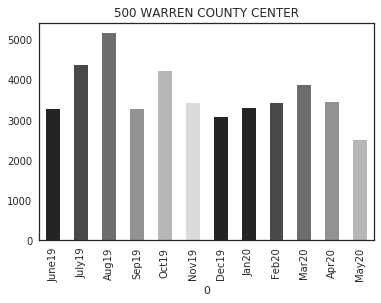

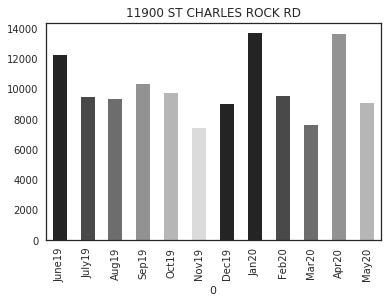

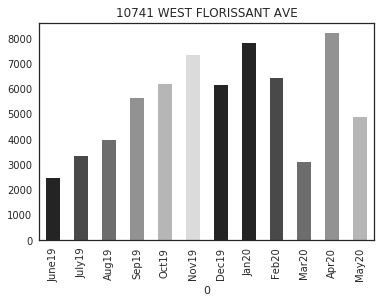

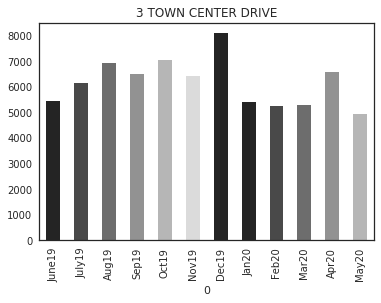

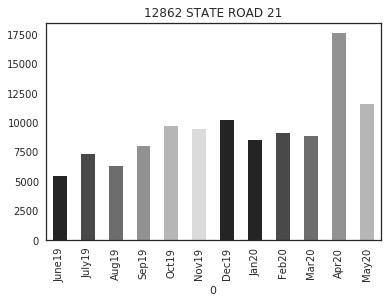

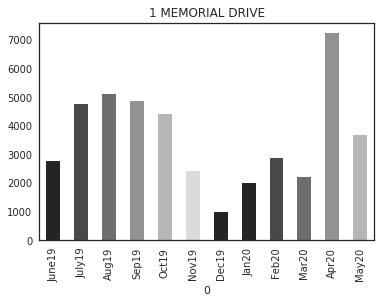

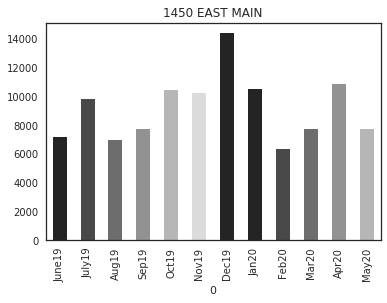

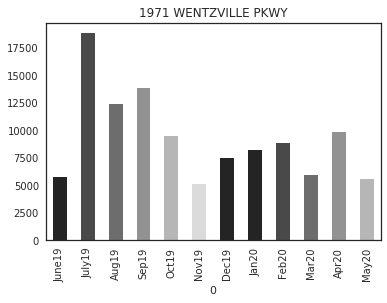

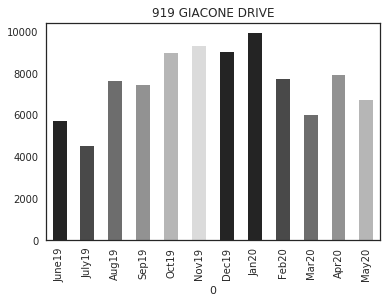

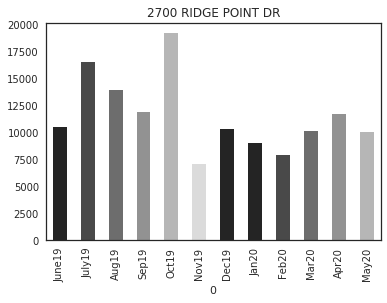

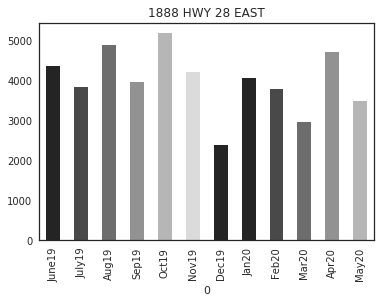

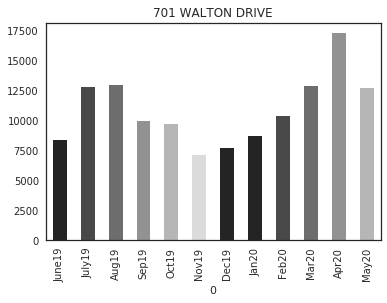

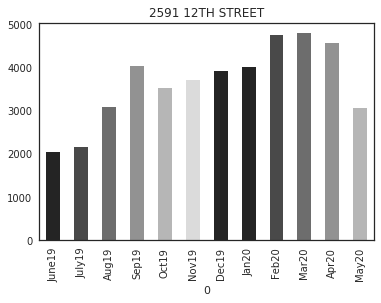

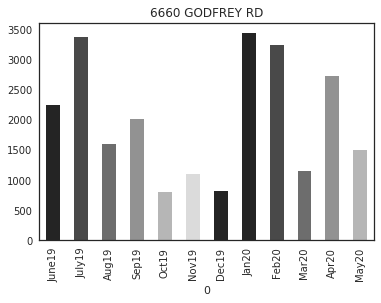

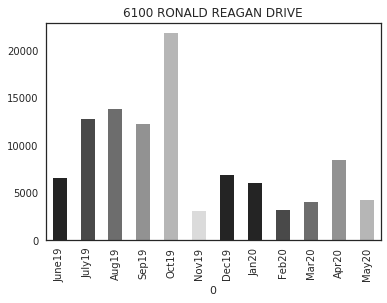

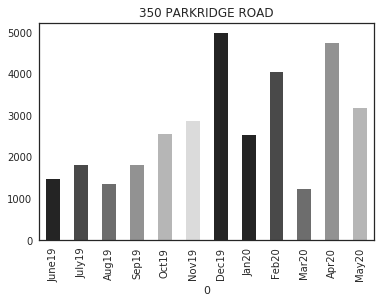

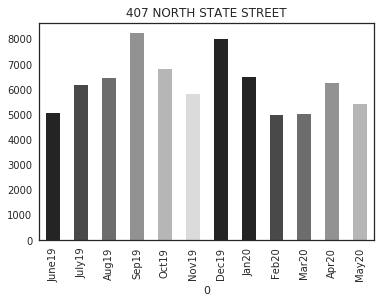

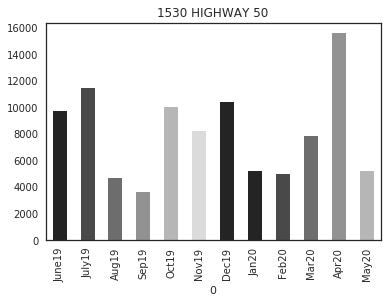

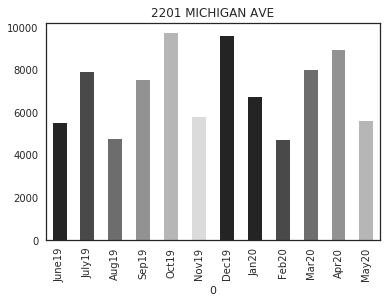

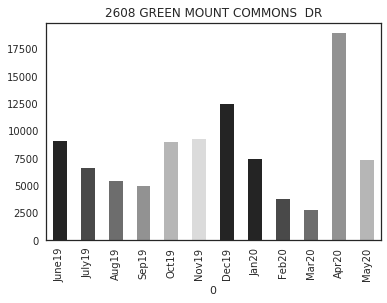

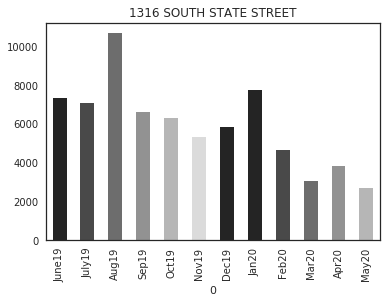

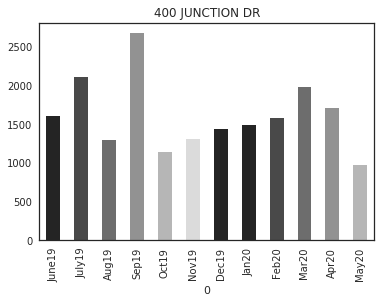

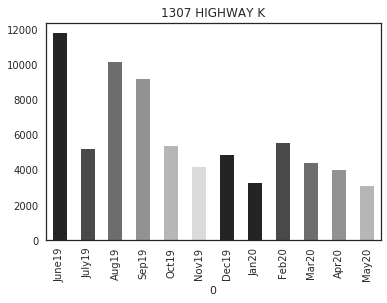

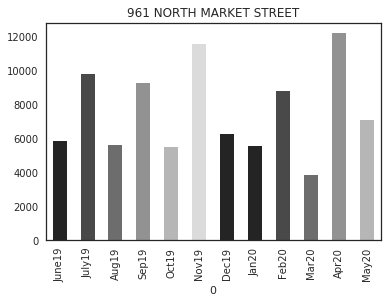

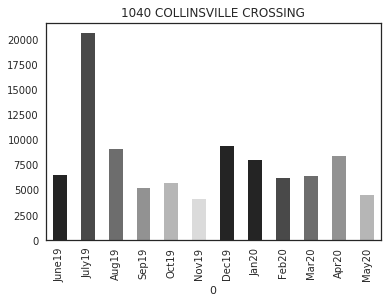

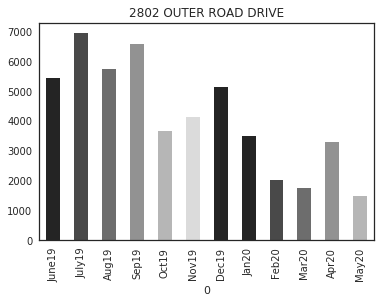

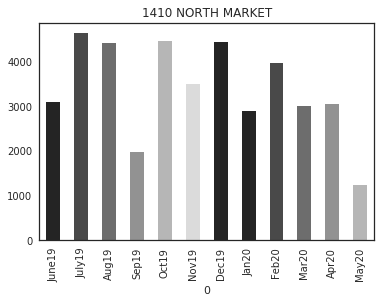

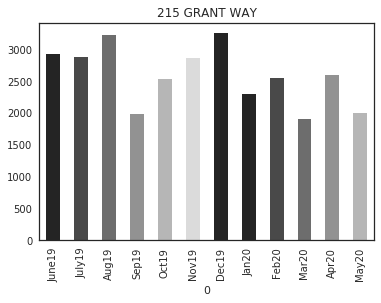

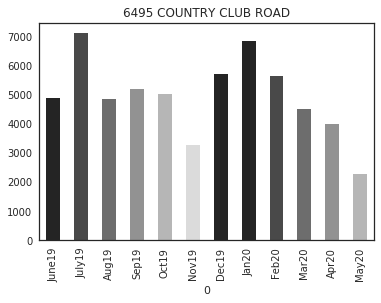

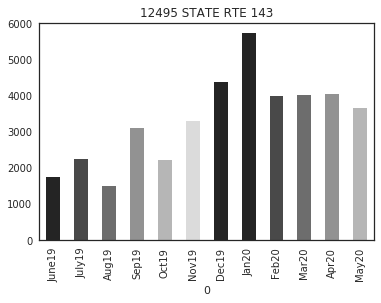

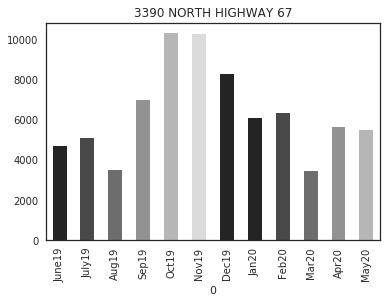

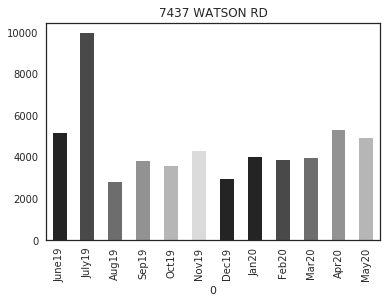

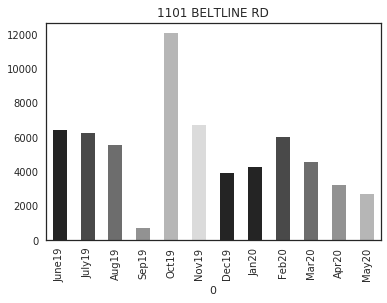

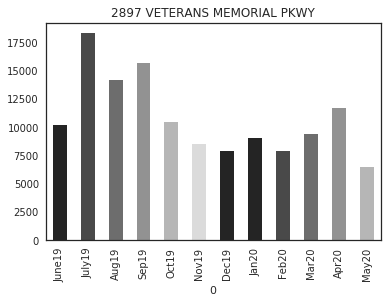

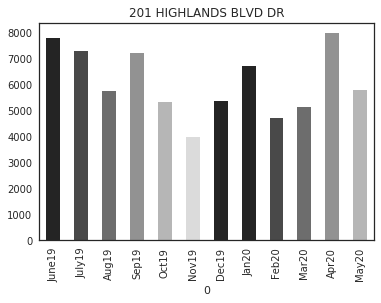

In [10]:


map_low_stores("WM", "May20")





## Google Maps functionality

Below is the programming to create our form of addresses and lat and lng. This snippet took our retail stores and combined the fields to create a full address. Then we used the Google Maps API to find the latitude and longitude for the stores we are monitoring. This snipped has been deactiviated because Google Services will charge after so many uses.

In [11]:
from googlemaps import Client as GoogleMaps
import csv
import pandas as pd
geolocator = Nominatim(user_agent="Test")


file = open("AddressMapping.csv")
reader = csv.reader(file)


mapping = list(reader)
result = [[item for item in row if item != ''] for row in mapping]
c = pd.DataFrame(result)
c["FullAddress"] = c[1] + " " + c[2] + " " + c[3]
c = c.drop(4, axis = 1)


print(c.head())


c.to_csv('new_location_map.csv')





file = open("new_location_map.csv")
reader = csv.reader(file)


mapping = list(reader)
result = [[item for item in row if item != ''] for row in mapping]

col_index = result[0]
result = result[1:]
result = result[:-12]

addresses = pd.DataFrame(result)

addresses['long'] = ''
addresses['lat'] = ''
addresses = addresses.rename(columns={1: 'key', 2: "street", 3:'city', 4: 'state', 5:'full_address'})
print(addresses.columns)
for x in range(len(addresses)):
    geocode_result = gmaps.geocode(addresses['full_address'][x])
    addresses['lat'][x] = geocode_result[0]['geometry']['location']['lat']
    addresses['long'][x] = geocode_result[0]['geometry']['location']['lng']
addresses.to_csv('new_location_map2.csv')



NameError: name 'Nominatim' is not defined

### Results of cell above are below.

We have an example of the csv file we have created below. This will be used for a vanity project of mapping out stores needed to be visited. Additionally this will more functionally be used to map store titles.

In [12]:
file = open("location_final.csv")
reader = csv.reader(file)


mapping = list(reader)
header = mapping[0]
mapping = mapping[1:]
c = pd.DataFrame(mapping, columns = header)
c = c[c.columns[1:]]
# c.to_csv('location_final.csv')
c.head()

,key,street,city,state,full_address,long,lat
0,101418,1530 HIGHWAY 50,O'FALLON,IL,1530 HIGHWAY 50 O'FALLON IL,-89.953982,38.5947949
1,101514,2201 MICHIGAN AVE,ARNOLD,MO,2201 MICHIGAN AVE ARNOLD MO,-90.37904739999999,38.4365381
2,10201,2608 GREEN MOUNT COMMONS DR,BELLEVILLE,IL,2608 GREEN MOUNT COMMONS DR BELLEVILLE IL,-89.9230192,38.5219637
3,10253,1316 SOUTH STATE STREET,JERSEYVILLE,IL,1316 SOUTH STATE STREET JERSEYVILLE IL,-90.31867299999999,39.1035161
4,10256,400 JUNCTION DR,GLEN CARBON,IL,400 JUNCTION DR GLEN CARBON IL,-89.9524688,38.7757424


***
# TESTING
***

## Function to compare different categories
### To Do
- Map shorter names for retail categories.
- Develop support functions to find possible innacurracies in retail reporting
    - Find stores that only have 1 category reported
- Similar function to our map_low_stores function

Comparison of WM Apr20 retail categories:


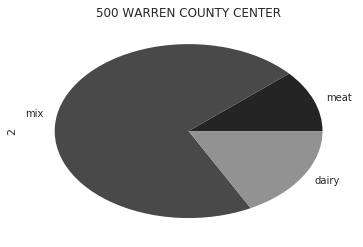

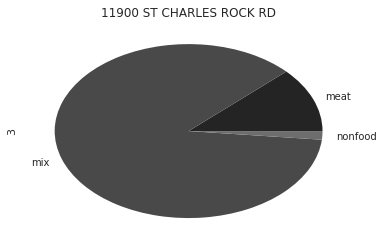

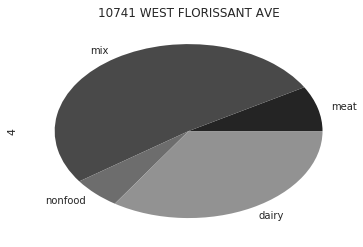

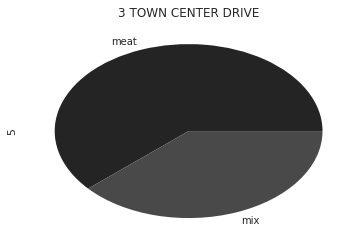

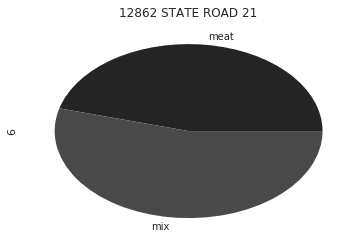

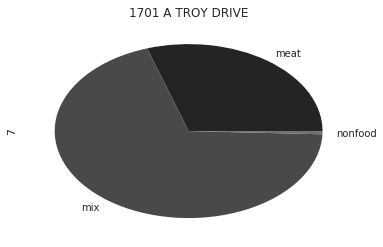

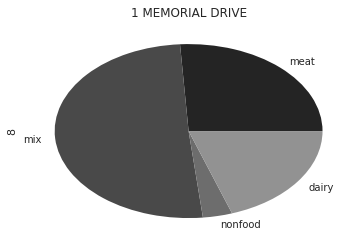

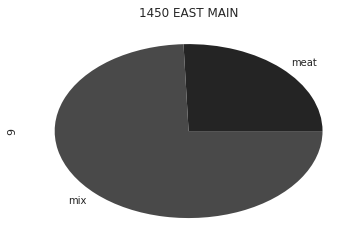

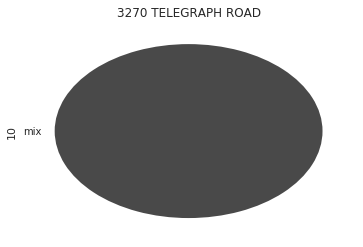

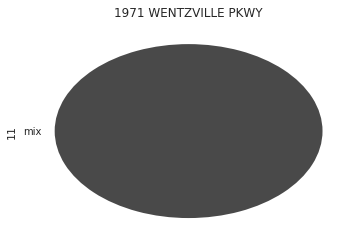

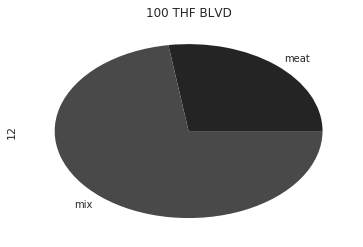

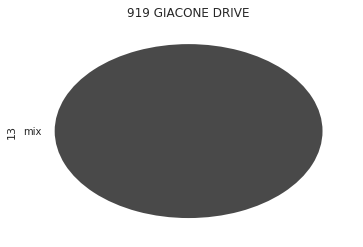

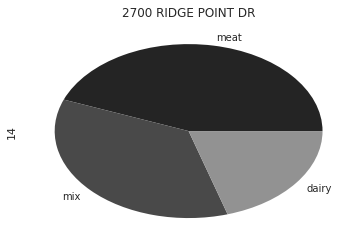

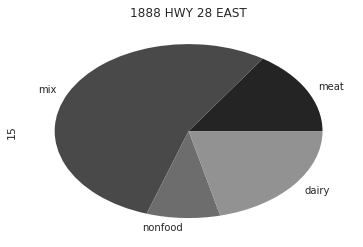

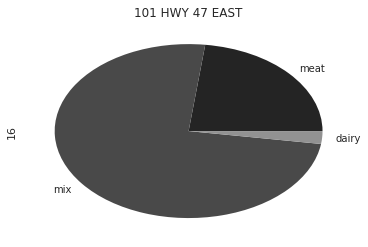

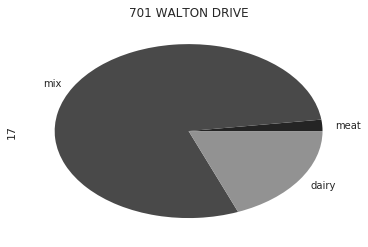

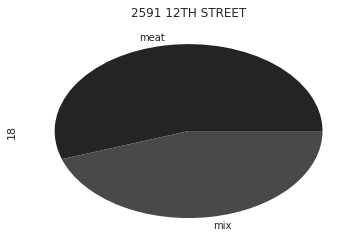

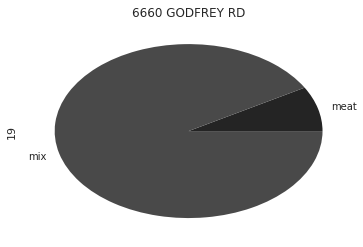

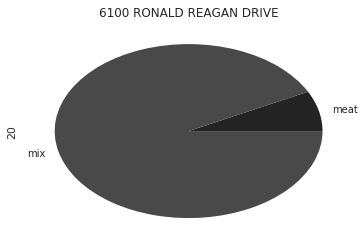

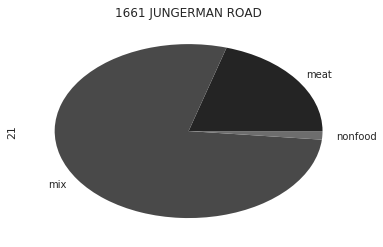

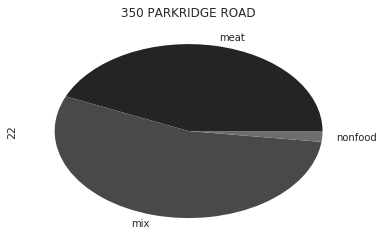

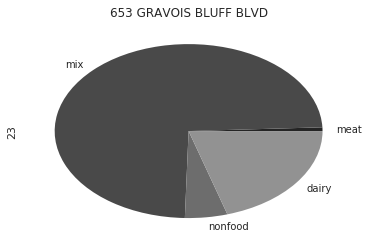

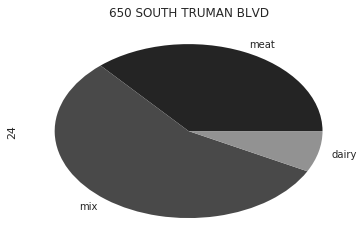

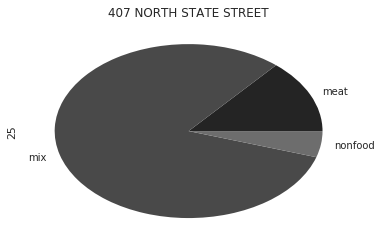

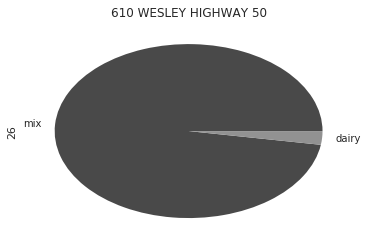

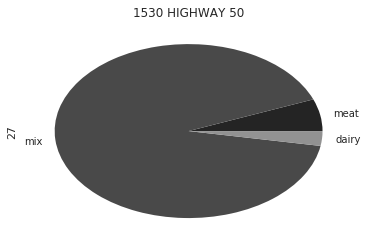

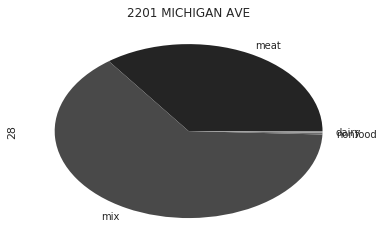

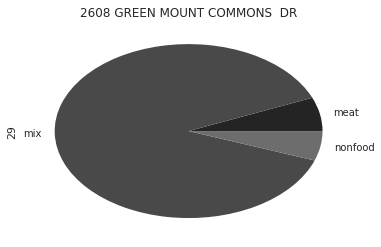

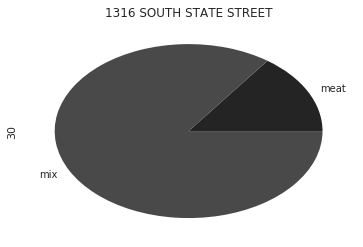

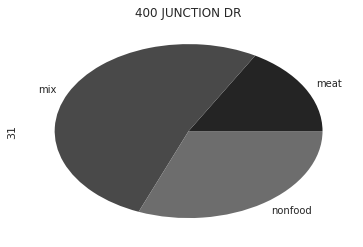

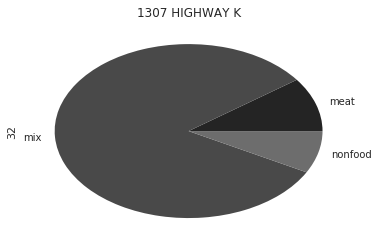

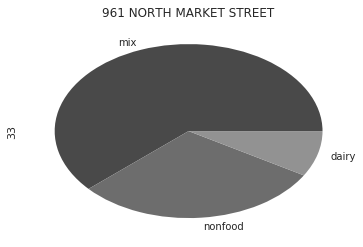

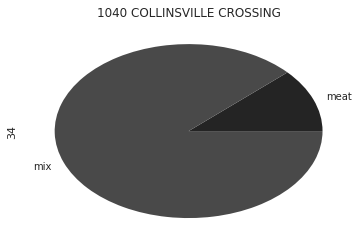

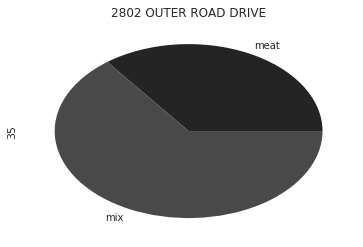

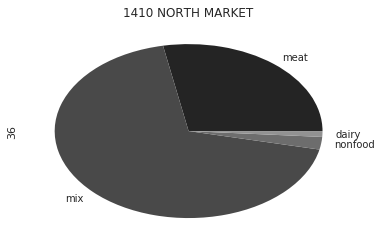

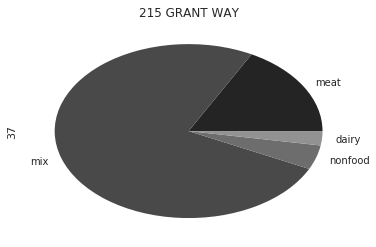

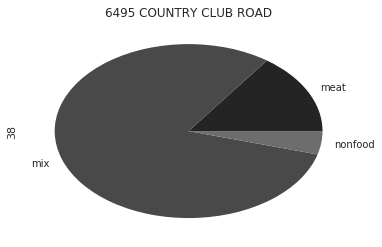

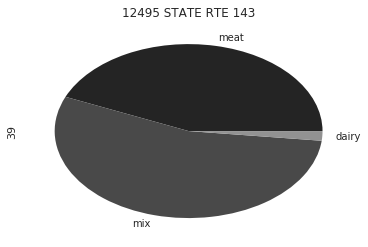

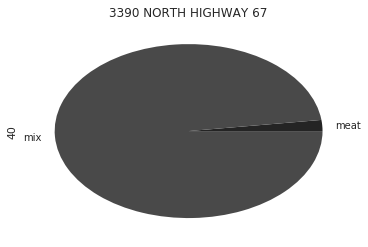

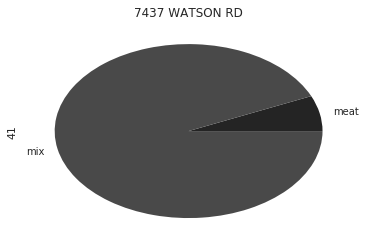

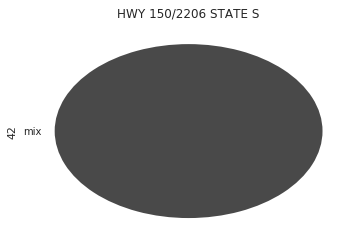

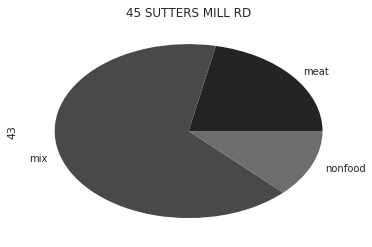

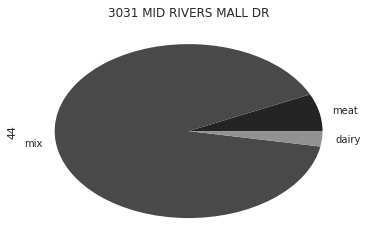

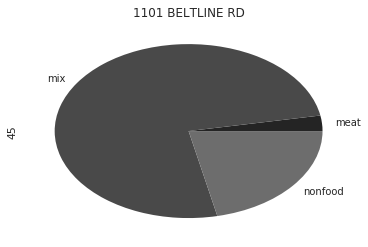

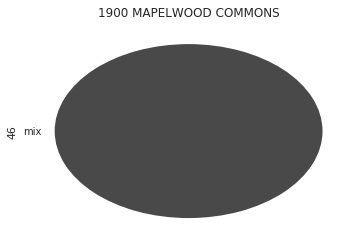

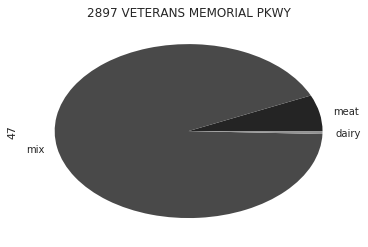

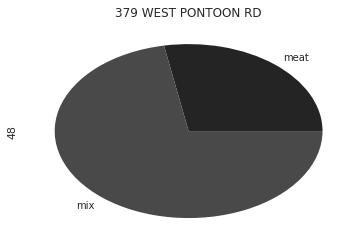

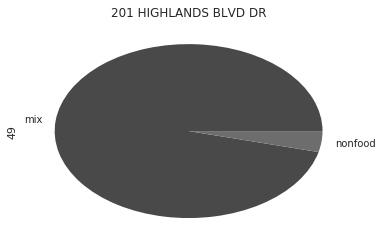

In [13]:
category_mapping = [
    ["RETAIL, PRODUCE", 'PRODUCE'],
    ["RETAIL, MEAT AND DELI", 'MEAT'],
    ["RETAIL, MIX FOOD", 'MIX'],
    ["RETAIL, NON FOOD", "NONFOOD"],
    ["RETAIL, DAIRY", "DAIRY"]
    ]


def category_df(banner, date):
    with open('banner/' + banner + '/' + banner + date + '.json') as f:

        current = json.load(f)
    index_row = ['store', 'produce', 'meat', 'mix', 'nonfood', 'dairy']
    final = []
    final.append(index_row)    
    print("Comparison of " + banner + " " + date + " retail categories:" )
    for key in current:
        if key != 'date':
            temp = []
            current_row = current[key]
            temp.append(key)
#             print(current_row)
            for cat in category_mapping:
                if cat[0] in current_row:
                    temp.append(current_row[cat[0]])
                else:
                    temp.append(0)
            final.append(temp)
            
            
    data = pd.DataFrame(final)
    new_header = data.iloc[0] #grab the first row for the header
    data = data[1:] #take the data less the header row
    data.columns = new_header
    data.fillna(value=0, inplace=True)

    return data
    
            
            
            
            

def plot_categories(banner, date):
    data = category_df(banner, date)
    for i in range(len(data) -1):
        temp_data = data.iloc[i+1][2:]
        title = locations[locations['key'] == str(data.iloc[i+1][0])]["street"]
        title = title.values[0]
        temp_data.plot.pie().set_title(title)
        plt.show()


plot_categories("WM", "Apr20")

## Store map function

Below is testing mapping using the long and lat coordinates to print out the locations for retail stores that need to be visited.

/home/will/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/will/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


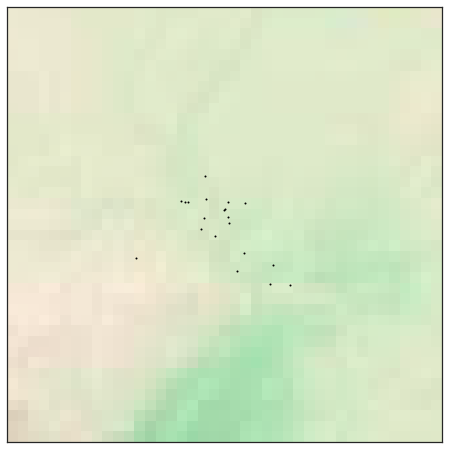

In [36]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=0.6E6, height=0.6E6, 
            lat_0=38.5, lon_0=-90,)
m.etopo(scale=0.5, alpha=0.5)

for row in range(20):
    x,y = m(c.iloc[row]['long'], c.iloc[row]['lat'])
    plt.plot(x, y, 'ok', markersize=2)
#     plt.text(x, y, c.iloc[row]['street'], fontsize=12);

# Map (long, lat) to (x, y) for plotting
